# Linear Regression - Uni-Variable

You will implement linear regression with one variable to predict profits for a donut outlet. Suppose you are the CEO of a donut franchise and are considering different cities for opening a new outlet. The chain already has outlets in various cities and you have data for profits and populations from these cities.

You would like to use this data to help you select which city to expand to next.

The file ‘univariate.txt’ contains the dataset for your linear regression problem. The first column is the population of a city and the second column is the profit of a donut outlet in that city. A negative value for profit indicates a loss.


## Setup

Set directory path

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
# change directory
os.chdir('/content/drive/My Drive/EM0007/1. Supervised/1. Regression/Assignment 1/uni')
!ls

Mounted at /content/drive
data  test_donut_with_predictions.xlsx	univariate.ipynb  univariate.txt


Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
print(tf.__version__)

2.15.0


## Prepare the Data

In [ ]:
dataframe = pd.read_csv('./data/univariate data.csv', index_col=None)
# check the data frame info
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None


## Plot the Data

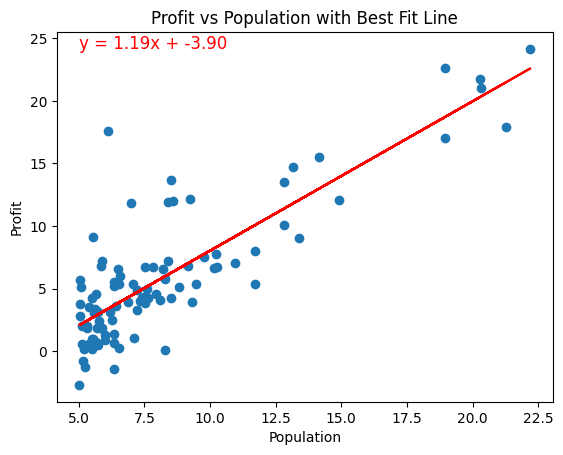

In [ ]:
# Assuming your DataFrame is named 'dataframe'
x = dataframe['Population']
y = dataframe['Profit']

# Create scatter plot
plt.scatter(x, y)

# Calculate the coefficients of the best fit line
m, b = np.polyfit(x, y, 1)

# Add the best fit line to the scatter plot
plt.plot(x, m*x + b, color='red')  # You can change the color if needed

# Adding title and labels
plt.title('Profit vs Population with Best Fit Line')
plt.xlabel('Population')
plt.ylabel('Profit')

# Displaying the equation on the plot
equation = f'y = {m:.2f}x + {b:.2f}'
plt.text(min(x), max(y), equation, fontsize=12, color='red')

# Showing the plot
plt.show()

## Process the Data

In [ ]:
X = dataframe[['Population']].values
y = dataframe['Profit'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [ ]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

## Build the Model

In [ ]:
# Define model architecture
model = Sequential()
model.add(Dense(1, input_shape=[1]))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')

# Apply feature normalization to the training data
X_train_norm, mean, std = featureNormalization(X_train)


## Train the Model

In [ ]:
# Train model for 200 epochs
history = model.fit(X_train_norm, y_train, epochs=200)


Epoch 1/200
3/3 [==============================] - 2s 9ms/step - loss: 63.8718
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 57.7699
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 52.2417
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 47.1956
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 42.9345
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 38.2494
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 34.9481
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 31.5474
Epoch 9/200
3/3 [==============================] - 0s 7ms/step - loss: 28.7251
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 26.3668
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 23.8861
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 22.1887
Epoch 13/200
3/3 [==============================]

Evaluate the Model

In [ ]:
# Evaluate the model on the test set
X_test_norm = (X_test - mean) / std
test_loss = model.evaluate(X_test_norm, y_test)


1/1 [==============================] - 0s 96ms/step - loss: 15.7061


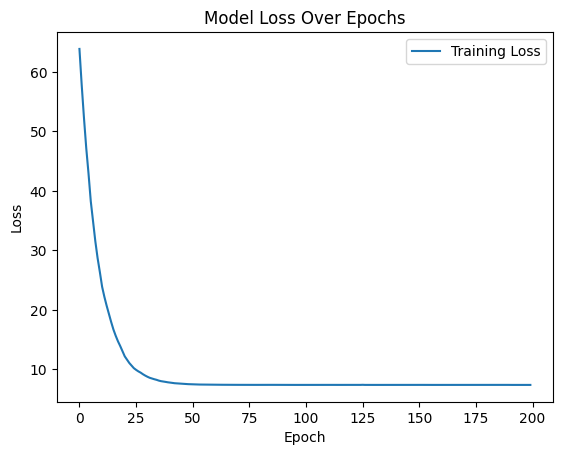

In [ ]:
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Predict

In [ ]:
# Load the new Excel dataset
new_data = pd.read_excel('/content/drive/My Drive/EM0007/1. Supervised/1. Regression/Assignment 1/uni/data/test donut.xlsx')

new_population = new_data['Population'].values

# Apply feature normalization using the same mean and std from training data
new_population_norm = (new_population - mean) / std

# Using the trained model to make predictions
predicted_profits = model.predict(new_population_norm)

# Create a new column in the new dataset to store the predictions
new_data['Predicted_Profit'] = predicted_profits

# Display the dataset with predicted profits
print(new_data)

#Save the updated dataset back to Excel
new_data.to_excel('/content/drive/My Drive/EM0007/1. Supervised/1. Regression/Assignment 1/uni/data/test_donut_with_predictions.xlsx', index=False)


1/1 [==============================] - 0s 68ms/step
   Population  Predicted_Profit
0           2         -2.157805
1           3         -0.870640
2           4          0.416525
3           5          1.703691
4           6          2.990856
5           7          4.278021
6           8          5.565186
7           9          6.852351
8          10          8.139516


## Save the Model

In [ ]:
model.save('./donut_model')